## 3dgfx the math
This is pretty much a collection of notes mostly inspired by [Computer Graphics, Fall 2009](https://www.youtube.com/playlist?list=PL_w_qWAQZtAZhtzPI5pkAtcUVgmzdAP8g). Yeah it's an old course but it's very good and covers a lot of essentials in a fast pace.

This is by no means a substitute for watching it yourself; please do if you're tyring to figure out this stuff. This is more like a companion guide where essential materials are made real by executable examples where possible and relevant.

We will focus only on the math. Any programming (besides the code in this book) will be out of scope. The target audience is experience programmers who already have (or should have) seen this stuff and need an extended cheat sheet in the form of a refresher.

> "All the meat I've eaten. I forgive myself"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## vector space
A **vector space** (also called a **linear space**) is a collection of objects called **vectors** which may be added together and multiplied by numbers (called **scalars** in this context). The operations of multiplication and addition must satisfy certain requirements called *axioms*.

A vector space over a field $F$ is a set $V$ together with two operations that satisfy the eight axioms below. Elements of $V$ are commonly called vectors. Elements of $F$ are commonly called scalars.

The first operation, called *vector addition* or just *addition* takes any two vectors $\vec{v}$ and $\vec{w}$ and assigns them to a third vector commonly written as $\vec{v} + \vec{w}$ and called the sum of these two vectors. The second operation, *vector multiplication* takes any scalar $a$ and any vector $\vec{v}$ and produces a new vector $a\vec{v}$.

### axioms
In the list below, let $\vec{u}$, $\vec{v}$ and $\vec{w}$ be arbitrary vectors in $V$, and $a$ and $b$ scalars in $F$.

#### associativity of addition
$\vec{u} + (\vec{v} + \vec{w}) = (\vec{u} + \vec{v}) + \vec{w}$

#### communativity of addition
$\vec{u} + \vec{w} = \vec{w} + \vec{u}$

#### identity element of addition
There exists an element $0 \in V$, called the *zero vector* such that $\vec{v} + 0 = \vec{v}$ for all $\vec{v} \in V$.

#### inverse elements of addition
For every element $\vec{v} \in V$ there exists an element $-\vec{v} \in V$ called the *additive inverse* of $\vec{v}$ such that $\vec{v} + (-\vec{v}) = 0$.

#### compatibility of scalar multiplication with field multiplication
$a(b\vec{v}) = (ab)\vec{v}$

#### identity element of scalar multiplication
 $1\vec{v} = \vec{v}$, where $1$ denotes the multiplicative identity in $F$.
 
#### distributivity of scalar multiplication with respect to vector addition
$a(\vec{u} + \vec{v}) = a\vec{u} + a\vec{v}$

#### distributivity of scalar multiplication with respect to field addition
$(a + b)\vec{v} = a\vec{v} + b\vec{v}$

When the scalar field $F$ is the real numbers $\mathbb{R}$, the vector space is called a *real vector space*. When the scalar field is complex numbers, the vector space is called a *complex vector space*.


## affine space
In an **affine space**, there is no distinguished point that serves as an origin. Hence, no vector has a fixed origin and no vector can be uniquely associated to a *point*. In an affine space, there are instead *displacement vectors* also called *translation vectors* or *simply translations*, between two points of the space. 

Thus it makes sense to subtract two points of the space, giving a translation vector, but it does not make sense to add two points of the space. 

$\vec{v} = P_2 - P_1$

Likewise, it makes sense to add a vector to a point of an affine space, resulting in a new point translated from the starting point by that vector.

$P_2 = P_1 + \vec{v}$

Note that we can interpolate any point $P_t$ on the line through points $P_1$ and $P_2$ by scaling the translation vector with a factor ${t}$.

$P_t = P_1 + t\vec{v} = P_1 + t(P_2 - P_1)$

This is demonstrated in the plot below.

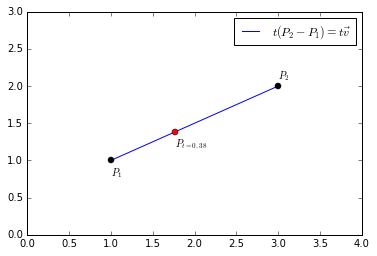

In [2]:
def plot_line(p1, p2, style='b', **kwargs):
    p1x, p1y = p1
    p2x, p2y = p2
    plt.plot([p1x, p2x], [p1y, p2y], style, **kwargs)

P1 = np.array([1, 1])
P2 = np.array([3, 2])

t = 0.38
Pt = P1 + t * (P2 - P1)

plot_line(P1, P2, label=r'$t(P_2 - P_1) = t\vec{v}$')

plt.plot(*P1, 'ko')
plt.plot(*P2, 'ko')
plt.plot(*Pt, 'ro')

plt.legend()

ax = plt.axes()
ax.set_xlim(0, 4)
ax.set_ylim(0, 3)
ax.annotate('$P_1$', (P1[0], P1[1]), xytext=(P1[0], P1[1] - 0.20))
ax.annotate('$P_2$', (P2[0], P2[1]), xytext=(P2[0], P2[1] + 0.10))
ax.annotate('$P_{t=%.2f}$' % t, (Pt[0], Pt[1]), xytext=(Pt[0], Pt[1] - 0.20))

We can also write this differently: 

$P_t = P1 +  t(P_2 - P_1) = (1 - t)P_1 + tP_2$. 

We can see this by refactoring it:

$(1 - t)P_1 + tP_2 = P_1 - tP_1 + tP_2 = P_1 + t(P_2 - P_1)$.

The benefit of writing it like $(1 - t)P_1 + tP$ is that now we have something that is known as an *affine combination*.

## affine combination
An **affine combination**, also sometimes called an *affine sequence*, of vectors ${x_1}, \ldots, {x_n}$ is a vector $\underset{i=1}{\overset{n}{\sum}}{\alpha_i}\cdot{x_i} = {\alpha_1}{x_1} + {\alpha_2}{x_2} + \cdots + {\alpha_n}{x_n}$ called a *linear combination* of ${x_1}, \ldots, {x_n}$ in which the sum of the coefficients is 1, thus: $\underset{i=1}{\overset{n}{\sum}}{\alpha_i} = 1$. 

Here the vectors ${x_i}$ are elements of a given vector space $V$ over a field $K$ and the coefficients ${\alpha_i}$ are scalars in $K$. This concept is important, for example, in *Euclidean geometry*.

The act of taking an affine combination commutes with any *affine transformation* $T$ in the sense that $T{\underset{i=1}{\overset{n}{\sum}}}{\alpha_i}\cdot{x_i} = \underset{i=1}{\overset{n}{\sum}}{\alpha_i}\cdot{T}{x_i}$.

In particular, any affine combination of the [fixed points](https://en.wikipedia.org/wiki/Fixed_point_(mathematics) of a given affine transformation $T$ is also a fixed point of $T$, so the set of fixed points of $T$ forms an affine subspace (in 3D: a line or a plane, and the trivial cases, a point or the whole space).

The important takeaway from the mumbo jumbo above is that, if we have some kind of thing that resembles $t_1{P_1} + t_2{P_2} + \cdots + t_n{P_n}$ and $t_1 + t_2 + \cdots + t_n = 1$ then we're dealing with an affine combination.

### interlude: thinking about affine space
As a thought experiment it's fun to stop and think about what it means to be in affine space. 

First we cannot just describe a point and say where it is. If you are in affine space you can be only described by your position relative to the combination you are in.

We also found that we can use triangles to define a point in two-dimensional affine space. It would make sense that we could use lines to represent points in one-dimensional affine space. If a triangle is $P_t = t_1{P_1} + t_2{P_2} + t_2{P_3}$ then it it will also make sense that a line will be $P_t = t_1{P_1} + t_2{P_2}$.

Even with the small amount of computations we have done we can already see that the affine space model is a really nice way of thinking abou

### barycentric coordinates
In the context of a triangle, **barycentric coordinates** are also known as *area coordinates* or *areal coordinates*, because the coordinates of $P$ with respect to triangle $ABC$ are equivalent to the (signed) ratios of the areas of $PBC$, $PCA$ and $PAB$ to the area of the reference triangle $ABC$. 

Areal and trilinear coordinates are used for similar purposes in geometry.

In order to figure out what this all means, we'll start with a triangle ${P_1}{P_2}{P_3}$ and a point ${P}$ inside of it. The code below defines these points and a `triangle_example1` function so we can re-use it. The function just plots the triangle, the points and some annotations.

In [3]:
P1 = 0, 1
P2 = 2, 5
P3 = 4, 2
P = 1.8, 2.9

def triangle_example1(): 
    plot_line(P1, P2)
    plot_line(P2, P3)
    plot_line(P3, P1)

    plt.plot(*P1, 'ko')
    plt.plot(*P2, 'ko')
    plt.plot(*P3, 'ko')
    plt.plot(*P, 'ro')

    ax = plt.axes()
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(0.5, 5.5)
    ax.annotate('$P_1$', P1, xytext=(P1[0] - 0.2, P1[1] + 0.2))
    ax.annotate('$P_2$', P2, xytext=(P2[0] + 0.2, P2[1] + 0))
    ax.annotate('$P_3$', P3, xytext=(P3[0] - 0.1, P3[1] - 0.3))
    ax.annotate('$P$', P, xytext=(P[0] + 0.1, P[1] + 0.2))
    ax.set_aspect(1.0)

And now we call the `triangle_example1` function to plot it:

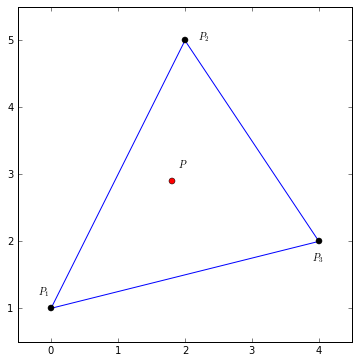

In [4]:
plt.figure(figsize=(6,6))
triangle_example1()

We have all the components to express $P$ in terms of the points of the triangle ${P_1}{P_2}{P_3}$. 

We start at $P_1$ and go some amount $t_2$ in the direction of the vector $P_2 - P_1$. We'll end up at $P1 + t_2(P2 - P1)$. From there we go some amount $t_3$ in the direction of the vector $P_3 - P_1$ and with the proper amounts (or *ratios*) of $t_2$ and $t_3$ we should be able to end up at $P$.

To visualize it we'll use a slightly different plot. The dashed line goes through point $P$ and runs in the direction of $P_3 - P_1$. We start at $P_1$ and go in the direction of the $P_2 - P_1$ vector until we end up at the dashed line. From there we just have to follow said dashed line until we end up at $P$.

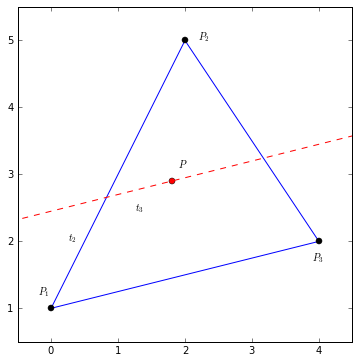

In [5]:
plt.figure(figsize=(6,6))
triangle_example1()

f = lambda x: 1/4 * x + 1
x = np.linspace(-1, 5, 5)

# FIXME: Let's just do it engineering style for now
f_x = f(x) - f(P[0]) + P[1]

plt.plot(x, f_x, 'r--')

ax = plt.axes()
ax.annotate(r'$t_2$', (0.25, 2))
ax.annotate(r'$t_3$', (1.25, 2.45))

In the end we'll end up with $P = P_1 + t_2(P2 - P1) + t_3(P_3 - P_1)$. 

What happened to $t_1$ though? Earlier we saw how to rewrite this so it's an *affine combination* and we can actually do that.

Let's try expanding everything, this usually helps:

$P = P_1 + t_2{P_2} - t_2{P_1} + t_3{P_3} - t_3{P_1}$

First thing we note is that this is just a simple addition. It's bascially $A + B + C + D$. Except here it it's $P = A + B - C + D - E$.

Another thing we can see is that $P_1$ appears multple times. It's important to note that this is not a characteristic of the point $P_1$ itself but just the fact that our calculation uses that as a reference point. It could be any point but $P_1$ is just an easy reference.

There's probably lots of ways to geek this out but I like to take the pragmatic way. We got a $P_1$, $-{t_2}{P_1}$ and $-{t_3}{P_1}$ and some other stuff added to that. We can simplify this:

$1 \cdot {P_1} - {t_2}{P_1} - {t_3}{P_1} = (1 - t_2 - t_3)P_1$

Now that we managed to capture all of the instances of $P_1$ in a single factor we can incorporate this with the factors of $P_2$ and $P_3$. As we found out above they are quite easy though, they are just $t_2{P_2}$ and $t_3{P_3}$ so that:

$P = 1 \cdot P_1 + t_2{P_2} - t_2{P_1} + t_3{P_3} - t_3{P_1} = (1 - t_2 - t_3)P_1 + t_2{P_2} + t_3{P_3}$

Considering that we are a looking for an *affine combination* and we ended up with:

$P = (1 - t_2 - t_3)P_1 + t_2{P_2} + t_3{P_3}$

We can now finally start to answer: "so what's $t_1$"? Well looking at the sequence above we would have to guess it's $1 - t_2 - t_3$ so that we end up with:

$P = t_1{P_1} + t_2{P_2} + t_3{P_3}$


$P = (1 - t_2 - t_3)P_1 + t_2{P_2} + t_3{P_3}$.

Now the point of this is not to find exactly where $P$ is. The point is *how* to find out how to calculate it in terms of three points in **affine space** and how it works.

The real beauty of this all lies in the fact that it doesn't really matter what the points are or what they represent as long as they can be made to operate in affine space. Which basically means they work according to the [axioms](http://localhost:8888/notebooks/3dgfx.ipynb#axioms) we listed at the top.